# 1. The Lists of Data Table
### 1) Case Data
- **Case**: Data of COVID-19 infection cases in South Korea

### 2) Patient Data
- **PatientInfo**: Epidemiological data of COVID-19 patients in South Korea
- **PatientRoute**: Route data of COVID-19 patients in South Korea

### 3) Time Series Data
- **Time**: Time series data of COVID-19 status in South Korea
- **TimeAge**: Time series data of COVID-19 status in terms of the age in South Korea
- **TimeGender**: Time series data of COVID-19 status in terms of gender in South Korea
- **TimeProvince**: Time series data of COVID-19 status in terms of the Province in South Korea

### 4) Additional Data
- **Region**: Location and statistical data of the regions in South Korea
- **Weather**: Data of the weather in the regions of South Korea
- **SearchTrend**: Trend data of the keywords searched in NAVER which is one of the largest portals in South Korea
- **SeoulFloating**: Data of floating population in Seoul, South Korea (from SK Telecom Big Data Hub)

# 2. The Structure of our Dataset
- What color means is that they have similar properties.
- If a line is connected between columns, it means that the values of the columns are partially shared.
- The dotted lines mean weak relevance.
![db](https://user-images.githubusercontent.com/50820635/78222744-b0824a80-7500-11ea-84d8-49775e562108.PNG)

# 3. The Detailed Description of each Data Table

In [115]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/coronavirusdataset/PatientInfo.csv
/kaggle/input/coronavirusdataset/Region.csv
/kaggle/input/coronavirusdataset/SearchTrend.csv
/kaggle/input/coronavirusdataset/TimeGender.csv
/kaggle/input/coronavirusdataset/Weather.csv
/kaggle/input/coronavirusdataset/Case.csv
/kaggle/input/coronavirusdataset/Time.csv
/kaggle/input/coronavirusdataset/TimeProvince.csv
/kaggle/input/coronavirusdataset/TimeAge.csv
/kaggle/input/coronavirusdataset/Policy.csv
/kaggle/input/coronavirusdataset/PatientRoute.csv
/kaggle/input/coronavirusdataset/SeoulFloating.csv


In [116]:
path = '/kaggle/input/coronavirusdataset/'

case = p_info = pd.read_csv(path+'Case.csv')
p_info = pd.read_csv(path+'PatientInfo.csv')
p_route = pd.read_csv(path+'PatientRoute.csv')
time = pd.read_csv(path+'Time.csv')
t_age = pd.read_csv(path+'TimeAge.csv')
t_gender = pd.read_csv(path+'TimeGender.csv')
t_provin = pd.read_csv(path+'TimeProvince.csv')
region = pd.read_csv(path+'Region.csv')
weather = pd.read_csv(path+'Weather.csv')
search = pd.read_csv(path+'SearchTrend.csv')
floating = pd.read_csv(path+'SeoulFloating.csv')

##### Before the Start..
- We make a structured dataset based on the report materials of KCDC and local governments.
- In Korea, we use the terms named '-do', '-si', '-gun' and '-gu',
- The meaning of them are explained below.

***


### Levels of administrative divisions in South Korea
#### Upper Level (Provincial-level divisions)
- **Special City**:
*Seoul*
- **Metropolitan City**:
*Busan / Daegu / Daejeon / Gwangju / Incheon / Ulsan*
- **Province(-do)**:
*Gyeonggi-do / Gangwon-do / Chungcheongbuk-do / Chungcheongnam-do / Jeollabuk-do / Jeollanam-do / Gyeongsangbuk-do / Gyeongsangnam-do*

#### Lower Level (Municipal-level divisions)
- **City(-si)**
[List of cities in South Korea](https://en.wikipedia.org/wiki/List_of_cities_in_South_Korea)
- **Country(-gun)**
[List of counties of South Korea](https://en.wikipedia.org/wiki/List_of_counties_of_South_Korea)
- **District(-gu)**
[List of districts in South Korea](https://en.wikipedia.org/wiki/List_of_districts_in_South_Korea)

***

<img src="https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F2815958%2F1c50702025f44b0c1ce92460bd2ea3f9%2Fus_hi_30-1.jpg?generation=1582819435038273&amp;alt=media" width=700>

***

Sources
- http://nationalatlas.ngii.go.kr/pages/page_1266.php
- https://en.wikipedia.org/wiki/Administrative_divisions_of_South_Korea

### 1) Case
#### Data of COVID-19 infection cases in South Korea
1. case_id: the ID of the infection case
  > - case_id(7) = region_code(5) + case_number(2)  
  > - You can check the region_code in 'Region.csv'
- province: Special City / Metropolitan City / Province(-do)
- city: City(-si) / Country (-gun) / District (-gu)
  > - The value 'from other city' means that where the group infection started is other city.
- group: TRUE: group infection / FALSE: not group
  > - If the value is 'TRUE' in this column, the value of 'infection_cases' means the name of group.  
  > - The values named 'contact with patient', 'overseas inflow' and 'etc' are not group infection. 
- infection_case: the infection case (the name of group or other cases)
  > - The value 'overseas inflow' means that the infection is from other country.  
  > - Tha value 'etc' includes individual cases, cases where relevance classification is ongoing after investigation, and cases under investigation.
- confirmed: the accumulated number of the confirmed
- latitude: the latitude of the group (WGS84)
- longitude: the longitude of the group (WGS84)


In [117]:
case.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Guro-gu,True,Guro-gu Call Center,98,37.508163,126.884387
1,1000002,Seoul,Dongdaemun-gu,True,Dongan Church,20,37.592888,127.056766
2,1000003,Seoul,Guro-gu,True,Manmin Central Church,41,37.481059,126.894343
3,1000004,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14,37.63369,126.9165
4,1000005,Seoul,Seongdong-gu,True,Seongdong-gu APT,13,37.55713,127.0403


In [118]:
print('There are {} unique values which are: \n'.format(len(case['province'].unique())))
print(case['province'].unique())
print('\n Out of which 9 are are provinces and 8 are Special cities/Metropolitan cities')

There are 17 unique values which are: 

['Seoul' 'Busan' 'Daegu' 'Gwangju' 'Incheon' 'Daejeon' 'Ulsan' 'Sejong'
 'Gyeonggi-do' 'Gangwon-do' 'Chungcheongbuk-do' 'Chungcheongnam-do'
 'Jeollabuk-do' 'Jeollanam-do' 'Gyeongsangbuk-do' 'Gyeongsangnam-do'
 'Jeju-do']

 Out of which 9 are are provinces and 8 are Special cities/Metropolitan cities


In [119]:
local_infection = case.pivot_table(index=['group'], aggfunc='size')
local_infection

group
False    50
True     62
dtype: int64

So there are 62 instance of local spread while 50 cases had roots from other cities.

In [120]:
group_cases = case.pivot_table(index = ['group'], aggfunc = 'sum').reset_index()
group_cases = group_cases.replace({True: 'Locally transmitted', False : 'Other cities'})
group_cases

,group,case_id,confirmed
0,Other cities,154300284,3009
1,Locally transmitted,186200205,6785


In [121]:
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins
import branca.colormap
from collections import defaultdict
print('Matplotlib, Seaborn and Folium are imported to visualize')

Matplotlib, Seaborn and Folium are imported to visualize


[Text(0, 0.5, 'confirmed cases'),
 Text(0.5, 1.0, 'Number of cases wrt transmission')]

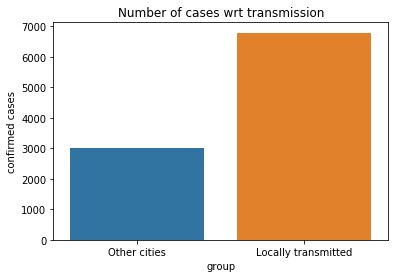

In [122]:
sns.barplot(x = 'group', y = 'confirmed', data = group_cases, ci = None).set(ylabel='confirmed cases', title='Number of cases wrt transmission')


In [123]:
print('There are {} unique values of the groups.'.format(len(case['infection_case'].unique())))

There are 43 unique values of the groups.


# Local Spread

###### First understanding the local spread in the country.
On the basis of **group** feature we can see the the local spread closely

**group** : TRUE: group infection / FALSE: not group
If the value is 'TRUE' in this column, the value of 'infection_cases' means the name of group.

The values named 'contact with patient', 'overseas inflow' and 'etc' are not group infection.

In [124]:
#extracting data with groups where only local spread took place
local_case_grp = case.query('group == True')
local_case_grp.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Guro-gu,True,Guro-gu Call Center,98,37.508163,126.884387
1,1000002,Seoul,Dongdaemun-gu,True,Dongan Church,20,37.592888,127.056766
2,1000003,Seoul,Guro-gu,True,Manmin Central Church,41,37.481059,126.894343
3,1000004,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14,37.63369,126.9165
4,1000005,Seoul,Seongdong-gu,True,Seongdong-gu APT,13,37.55713,127.0403


In [125]:
print('So there are {} different groups where local spread took place'.format(len(local_case_grp['infection_case'].unique())))

So there are 40 different groups where local spread took place


Now that we have the cases started due to the group, we will look at the cases in the same city.
Removing the cases from groups of other cities as, we don't have their coordinates.

In [126]:
local_case_grp = local_case_grp.loc[local_case_grp['city'] != 'from other city']
print('Now the shape of the data is {}'.format(local_case_grp.shape))
local_case_grp.head()

Now the shape of the data is (40, 8)


,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Guro-gu,True,Guro-gu Call Center,98,37.508163,126.884387
1,1000002,Seoul,Dongdaemun-gu,True,Dongan Church,20,37.592888,127.056766
2,1000003,Seoul,Guro-gu,True,Manmin Central Church,41,37.481059,126.894343
3,1000004,Seoul,Eunpyeong-gu,True,Eunpyeong St. Mary's Hospital,14,37.63369,126.9165
4,1000005,Seoul,Seongdong-gu,True,Seongdong-gu APT,13,37.55713,127.0403


In [127]:
latitude,longitude = 35.9078, 127.7669      #Coordinates of South Korea
#Plotting map of South korea
S_korea = folium.Map(location = [latitude,longitude],zoom_start = 7)


S_korea.add_child(plugins.HeatMap(zip(local_case_grp['latitude'],local_case_grp['longitude'], local_case_grp['confirmed']), radius = 10))



In [128]:
print('There are {} different province where local spread through {} groups took place. \n \
        '.format(len(local_case_grp['province'].unique()),len(local_case_grp['infection_case'].unique())))

There are 12 different province where local spread through 39 groups took place. 
         


As there are 39 different infection case in the data of 40 rows, each name of the group in the is different.

[Text(0, 0.5, 'Group of infection'),
 Text(0.5, 0, 'Confirmed cases'),
 Text(0.5, 1.0, 'Cases due to group')]

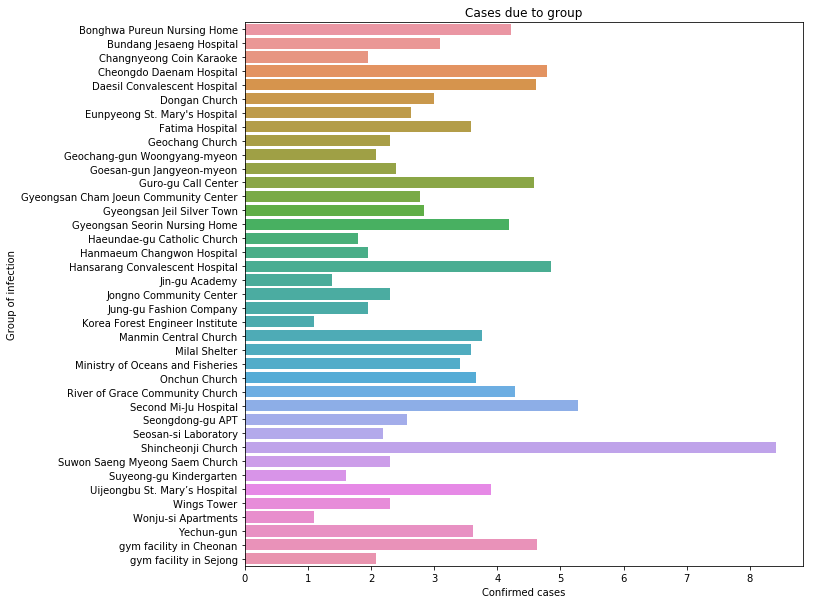

In [129]:
infection_case_local = local_case_grp.pivot_table(index = 'infection_case',aggfunc = 'sum')['confirmed'].reset_index()
infection_case_local['confirmed'] = np.log(infection_case_local['confirmed'])
fig_dims = (10,10)
fig, ax = plt.subplots(figsize=fig_dims)

sns.barplot(x = 'confirmed',y = 'infection_case', data = infection_case_local, ax = ax) \
    .set(ylabel = 'Group of infection', xlabel = 'Confirmed cases', title = 'Cases due to group')

In [130]:
local_case_grp.loc[local_case_grp['infection_case']=='Shincheonji Church']

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
20,1200001,Daegu,Nam-gu,True,Shincheonji Church,4510,35.84008,128.5667


1. It can be concluded that Shincheonji Church is the hotspot of the local spread.
2. Shincheonji Church is present in the city of Nam-gu in the Daegu province.
3. Which will lead to the increase in the number of cases in Daegu.

In [131]:
confirmed = local_case_grp.pivot_table(index=['province'], aggfunc='sum')
local_province_case_grp = local_case_grp.pivot_table(index=['province'], aggfunc=pd.Series.nunique)
local_province_case_grp = local_province_case_grp.merge(confirmed, on='province',how = 'inner')
local_province_case_grp = local_province_case_grp.drop(columns = ['case_id_x','confirmed_x','group_x','latitude','longitude','case_id_y','group_y']) \
                                .rename(columns = {'confirmed_y':'confirmed_cases'}).reset_index()
local_province_case_grp

,province,city,infection_case,confirmed_cases
0,Busan,4,4,54
1,Chungcheongbuk-do,1,1,11
2,Chungcheongnam-do,2,2,112
3,Daegu,4,5,4968
4,Daejeon,1,1,3
5,Gangwon-do,1,1,3
6,Gyeonggi-do,3,4,153
7,Gyeongsangbuk-do,5,7,360
8,Gyeongsangnam-do,4,5,42
9,Jeollanam-do,1,1,2


Text(0.5, 1.05, 'Cities infected and confirmed cases wrt province')

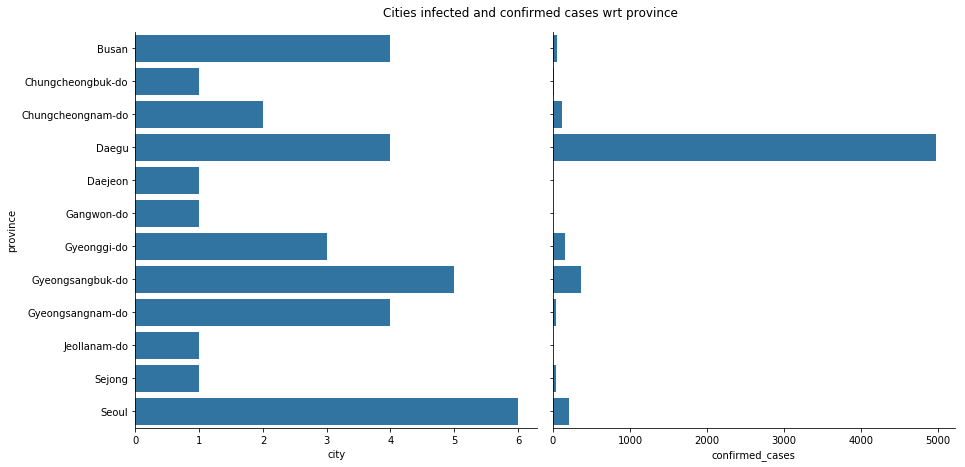

In [132]:
g = sns.PairGrid(local_province_case_grp, x_vars=["city","confirmed_cases"], y_vars=["province"], height=6)
g.map(sns.barplot)
g.fig.suptitle('Cities infected and confirmed cases wrt province', y = 1.05)

1. It is clearly visible that the province Daegu has the most number of locally spread cases of 4968 cases in its 4 cities.
2. City Seoul has the most number of affected cities of 6 but has comparitively very low number of cases. Hence it is the best performance city in controlling the local spread.

[Text(0, 0.5, 'Cities in Daegu'),
 Text(0.5, 0, 'Confirmed cases'),
 Text(0.5, 1.0, 'Cases in Daegu')]

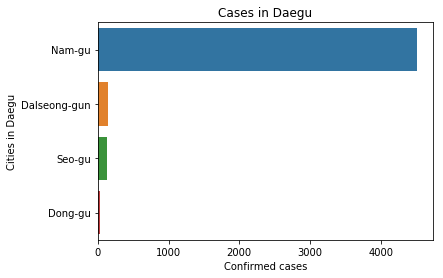

In [133]:
sns.barplot(x= 'confirmed',y = 'city',data= local_case_grp.loc[local_case_grp['province'] == 'Daegu'],ci = None) \
        .set(xlabel='Confirmed cases', ylabel='Cities in Daegu', title='Cases in Daegu')


[Text(0, 0.5, 'Cities in Seoul'),
 Text(0.5, 0, 'Confirmed cases'),
 Text(0.5, 1.0, 'Cases in Seoul')]

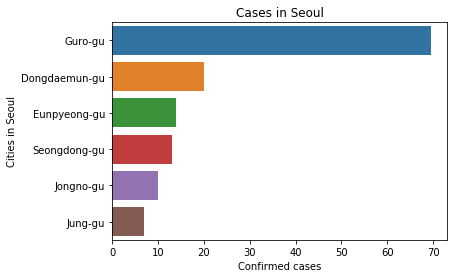

In [134]:
sns.barplot(x= 'confirmed',y = 'city',data= local_case_grp.loc[local_case_grp['province'] == 'Seoul'],ci = None) \
        .set(xlabel='Confirmed cases', ylabel='Cities in Seoul', title='Cases in Seoul')

[Text(0, 0.5, 'Cities in Gyeongsangbuk-do'),
 Text(0.5, 0, 'Confirmed cases'),
 Text(0.5, 1.0, 'Cases in Gyeongsangbuk-do')]

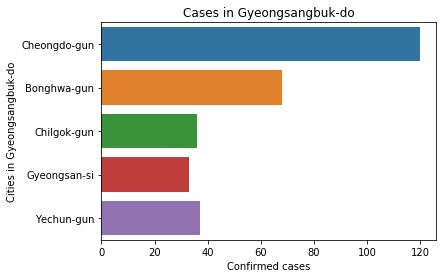

In [135]:
sns.barplot(x= 'confirmed',y = 'city',data= local_case_grp.loc[local_case_grp['province'] == 'Gyeongsangbuk-do'],ci = None) \
        .set(xlabel='Confirmed cases', ylabel='Cities in Gyeongsangbuk-do', title='Cases in Gyeongsangbuk-do')

1. It is clear that Daegu is the most affected Province with Nam-gu being the worst hit city.
2. Seoul has well distributed number of cases and comparitively less cases with most cities affected.
3. Gyeongsangbuk-do also has significant amount of case with Cheondo-gun being the worst hit city.

[Text(0.5, 0, 'confirmed cases'),
 Text(0.5, 1.0, 'Confirmed cases in different cities due to Local Transmission')]

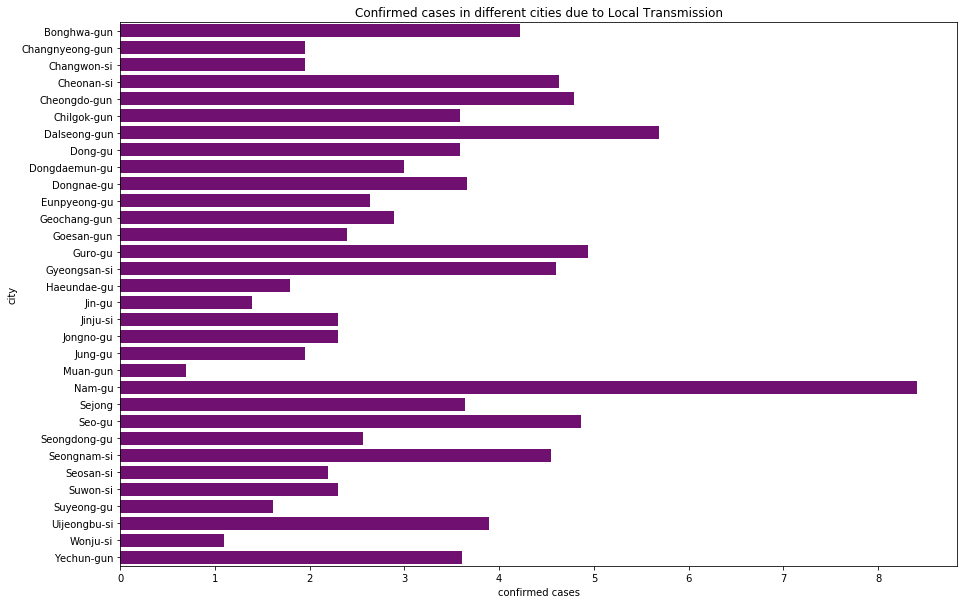

In [136]:
local_case_city_grp = local_case_grp.pivot_table(index='city',aggfunc = 'sum').reset_index()
plt.figure(figsize=(15,10))
local_case_city_grp['confirmed'] = np.log(local_case_city_grp['confirmed'])
sns.barplot(x= 'confirmed',y = 'city', color = 'purple',data= local_case_city_grp).set(xlabel='confirmed cases', title='Confirmed cases in different cities due to Local Transmission')

### The conclusion of the local spread
1. The  highest local spread too place in Daegu with Nam-gu with most cases.
2. Shincheonji Church being the hotspot in the Nam-gu city in Daegu province with most cases of local spread.
3. Seoul have distributed number of cases but still controlled.

# Spread from other cities

In [137]:
other_cities_grp = case.query('group == False')
other_cities_grp.head()
#print(other_cities_grp.shape)

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
8,1000009,Seoul,-,False,overseas inflow,313,-,-
9,1000010,Seoul,-,False,contact with patient,18,-,-
10,1000011,Seoul,-,False,etc,23,-,-
17,1100007,Busan,-,False,overseas inflow,21,-,-
18,1100008,Busan,-,False,contact with patient,18,-,-


Here we have all the cases which did not spread through local transmission but from other countries or through patient.
That's why we don't have the coordinates of the city.

Let's drop those columns.

In [138]:
other_cities_grp = other_cities_grp.drop(columns=['city','group','latitude','longitude'],axis=1)
other_cities_grp.head()

,case_id,province,infection_case,confirmed
8,1000009,Seoul,overseas inflow,313
9,1000010,Seoul,contact with patient,18
10,1000011,Seoul,etc,23
17,1100007,Busan,overseas inflow,21
18,1100008,Busan,contact with patient,18


[Text(0.5, 0, 'confirmed cases'),
 Text(0.5, 1.0, 'Cases due to non-local transmission')]

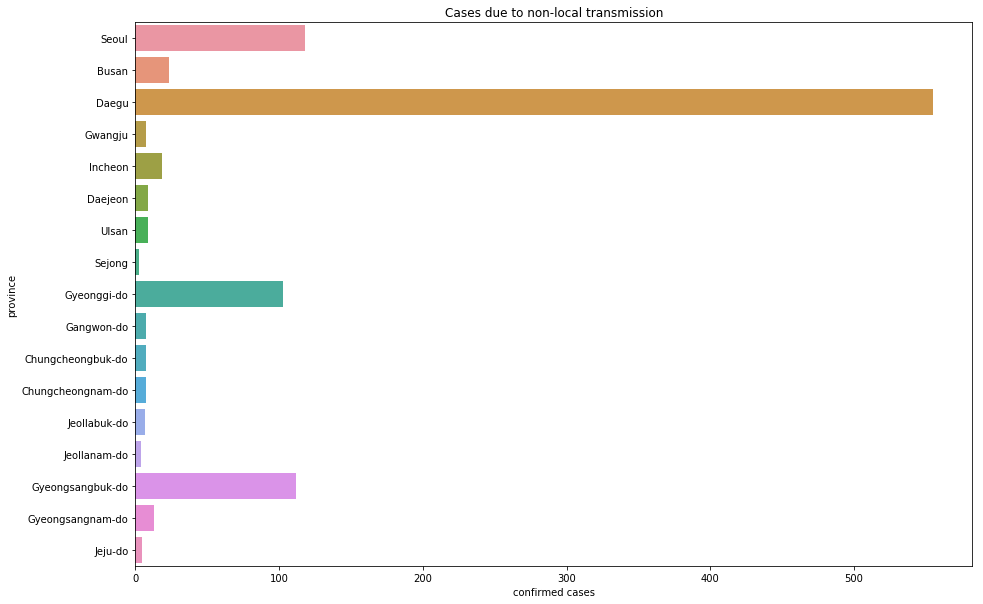

In [139]:
other_cities_province_grp = other_cities_grp.pivot_table(index = ['province'],aggfunc = 'sum')
#other_cities_province_grp['confirmed'] = np.log(other_cities_province_grp.['confirmed'])
plt.figure(figsize=(15,10))
sns.barplot(y = 'province',x = 'confirmed', data = other_cities_grp,ci = None ).set(xlabel='confirmed cases', title='Cases due to non-local transmission')

Text(0.5, 1.02, 'Cases due to')

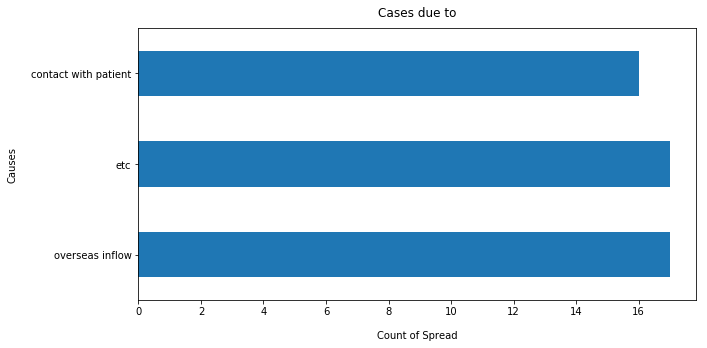

In [140]:
other_cities_grp['infection_case'].value_counts().plot(kind = 'barh',rot = 0,figsize = (10,5))
plt.xlabel("Count of Spread", labelpad=14)
plt.ylabel("Causes", labelpad=14)
plt.title("Cases due to", y=1.02)

The value 'overseas inflow' means that the infection is from other country.
Tha value 'etc' includes individual cases, cases where relevance classification is ongoing after investigation, and cases under investigation.

1. All the causes caused the same amount of spread  

[Text(0, 0.5, 'confirmed cases'),
 Text(0.5, 0, 'Cause'),
 Text(0.5, 1.0, 'Reasons of cases')]

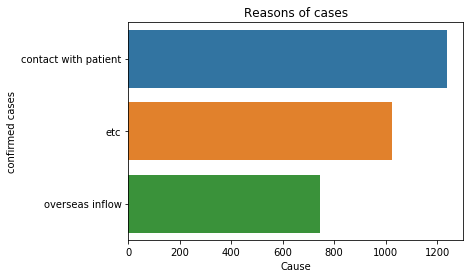

In [141]:
other_city_case_grp = other_cities_grp.pivot_table(index='infection_case',aggfunc = 'sum').reset_index()

other_city_case_grp['confirmed'] = other_city_case_grp['confirmed']
sns.barplot(x= 'confirmed',y = 'infection_case',data= other_city_case_grp).set(xlabel='Cause', ylabel='confirmed cases', title='Reasons of cases')

1. Cases confirmed due to coming in contact with the patient is 1240 which is the most cases due to the spread from outside.
2. Cases from overseas inflow is the lowest which 745.
3. Other causes also contributed 1024 cases.

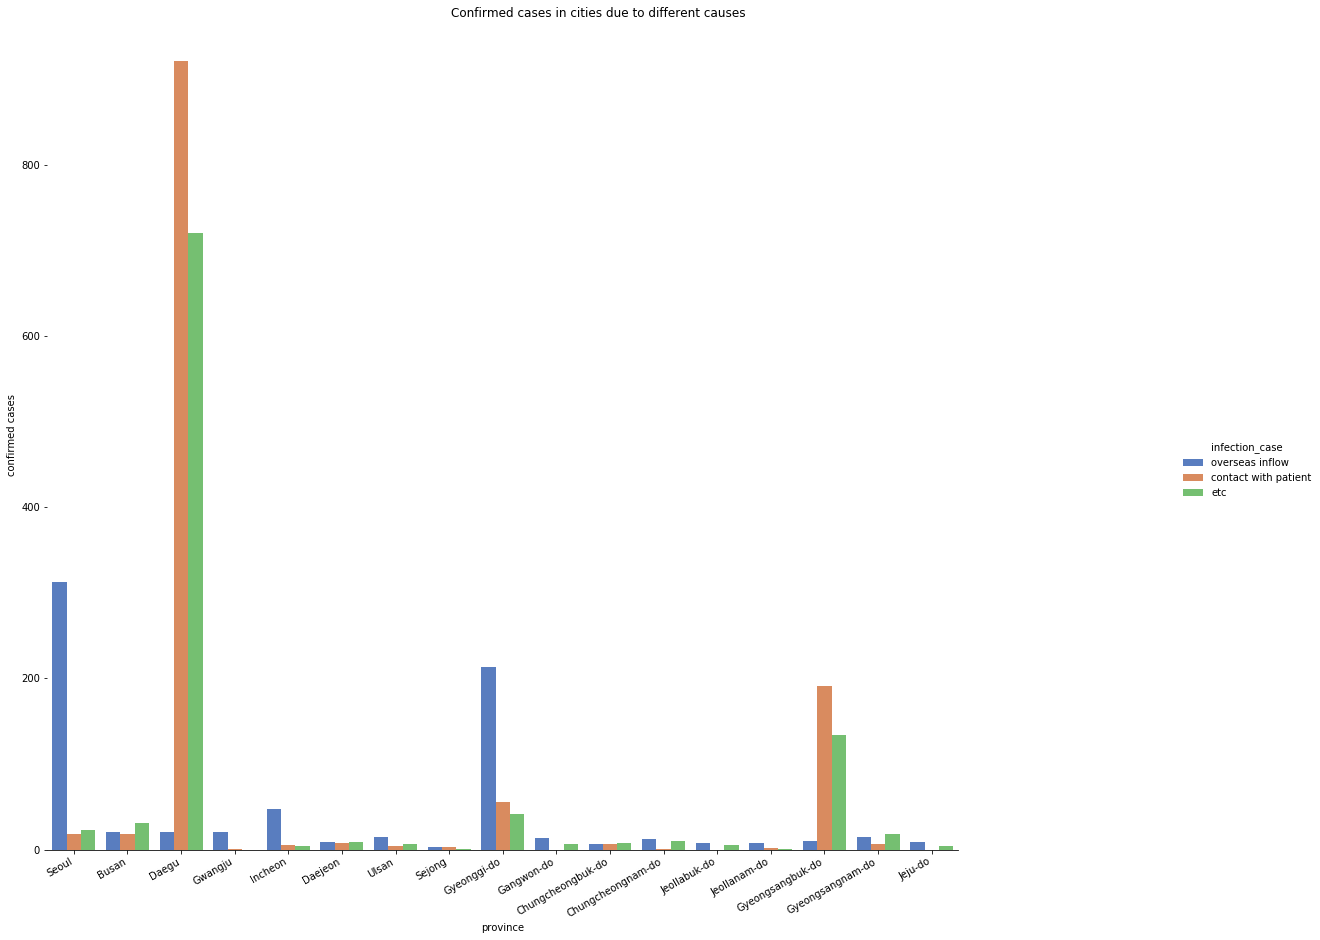

In [153]:
g = sns.catplot(x="province", y="confirmed", hue="infection_case", data=other_cities_grp,
                height=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels('confirmed cases')
g.fig.suptitle('Confirmed cases in cities due to different causes')
g.fig.set_figwidth(25)
g.fig.set_figheight(20)
g.fig.autofmt_xdate()

## Conclusion
1. It can be concluded that Daegu is the most affected city among all and is suffer by both local and overseas transmission main reason being the contact with the patient.
2. Seoul being the the province with most number of affected cities controlled the spread really well. Having the most number of overseas inflow transmission, it can be concluded that it cacn be a tourist place or may be many NRIs.
3. Number of cases from local transmission is 6785 while cases from overseas is 3009.
4. 'Contact with the patient' caused the most number of cases.
5. Reasons for many cases are still unknown or under investigation.
